You need to work on IMDB data to prepare insights on Titles (movies and TV shows)
You need to analyse data to bright out the following insights:
1. Which Genre gets the maximum votes? ################################################################################
2. Which actor - director pair is most successful (in terms of IMDB ratings)?##########################################
3. Male leads are most successful in which age bracket?
4. For TV shows, what is the avg episode duration of the best TV shows?################################################
5. Best TV shows last for how many seasons?
6. In which year maximum TV shows ended?###############################################################################
7.  What factors lead to higher rating

In [1]:
import pandas as pd
import zipfile
from matplotlib import pyplot as plt
import numpy as np

In [2]:
title_ratings = pd.read_csv(r'C:\Users\ganes\Downloads\Imdb\title.ratings.tsv.gz',sep='\t')
title_basics = pd.read_csv(r'C:\Users\ganes\Downloads\Imdb\title.basics.tsv.gz',sep='\t')
title_episode = pd.read_csv(r'C:\Users\ganes\Downloads\Imdb\title.episode.tsv.gz',sep='\t')
title_crew = pd.read_csv(r'C:\Users\ganes\Downloads\Imdb\title.crew.tsv.gz',sep='\t')
name_basics=pd.read_csv(r'C:\Users\ganes\Downloads\Imdb\name.basics.tsv.gz',sep='\t')
title_principals=pd.read_csv(r'C:\Users\ganes\Downloads\Imdb\title.principals.tsv.gz',sep='\t')

C:\Users\ganes\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
title_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [14]:
(title_episode.head())

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tt0041038,1,9
1,tt0042816,tt0989125,1,17
2,tt0042889,tt0989125,\N,\N
3,tt0043426,tt0040051,3,42
4,tt0043631,tt0989125,2,16


In [15]:
title_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.6,1605
1,tt0000002,6.0,197
2,tt0000003,6.5,1278
3,tt0000004,6.1,121
4,tt0000005,6.1,2042


In [16]:
title_crew.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [17]:
name_basics.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0043044,tt0050419,tt0053137,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0038355,tt0117057,tt0071877"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,producer","tt0054452,tt0059956,tt0057345,tt0049189"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0080455,tt0077975,tt0072562"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0083922,tt0060827,tt0050986"


In [18]:
season=title_episode.sort_values(by='parentTconst',ignore_index=True)

In [19]:
season.tail()

,tconst,parentTconst,seasonNumber,episodeNumber
4777967,tt10274588,tt9916678,1,6
4777968,tt10009320,tt9916678,1,1
4777969,tt10313854,tt9916678,1,8
4777970,tt10378536,tt9916678,1,11
4777971,tt10274602,tt9916678,1,7


In [20]:
(title_crew.head())

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [21]:
df_vote=title_ratings.drop(['averageRating'],axis=1)

In [22]:
df_genre=title_basics[['tconst','genres']]

In [23]:
df_genre

,tconst,genres
0,tt0000001,"Documentary,Short"
1,tt0000002,"Animation,Short"
2,tt0000003,"Animation,Comedy,Romance"
3,tt0000004,"Animation,Short"
4,tt0000005,"Comedy,Short"
...,...,...
6724395,tt9916848,"Action,Drama,Family"
6724396,tt9916850,"Action,Drama,Family"
6724397,tt9916852,"Action,Drama,Family"
6724398,tt9916856,Short


In [24]:
df_genre=df_genre.dropna()

In [25]:
b = pd.DataFrame(df_genre.genres.str.split(',').tolist(), index=df_genre.tconst).stack()
b = b.reset_index()[['tconst',0]] # var1 variable is currently labeled 0
b.columns = [ 'tconst', 'genres'] # renaming var1

In [26]:
df_genre=b
df_genre

,tconst,genres
0,tt0000001,Documentary
1,tt0000001,Short
2,tt0000002,Animation
3,tt0000002,Short
4,tt0000003,Animation
...,...,...
10714563,tt9916852,Family
10714564,tt9916856,Short
10714565,tt9916880,Animation
10714566,tt9916880,Comedy


In [107]:
df_vote

,tconst,numVotes
0,tt0000001,1605
1,tt0000002,197
2,tt0000003,1278
3,tt0000004,121
4,tt0000005,2042
...,...,...
1026234,tt9916576,9
1026235,tt9916578,17
1026236,tt9916720,49
1026237,tt9916766,13


In [108]:
df1 = pd.DataFrame([[1, 'a'],
                    [2,'b'],
                    [1, 'b'],
                    [3, 'c']], columns=['id', 'attr'])
df2 = pd.DataFrame([[1, 'd'],
                    [3, 'e'],
                    [4, 'f']], columns=['id', 'group'])

df1.merge(df2)

,id,attr,group
0,1,a,d
1,1,b,d
2,3,c,e


In [27]:
df1=df_genre.merge(df_vote)
df1=df1.drop(['tconst'],axis=1)
df1


,genres,numVotes
0,Documentary,1605
1,Short,1605
2,Animation,197
3,Short,197
4,Animation,1278
...,...,...
2007847,Horror,49
2007848,Mystery,49
2007849,Family,13
2007850,Reality-TV,13


In [28]:
df1=df1.groupby('genres',as_index=False ).sum()
df1=df1.sort_values(by='numVotes',ascending=False,ignore_index=True)
df1

,genres,numVotes
0,Drama,505451123
1,Comedy,300700524
2,Action,296217739
3,Adventure,251562513
4,Crime,189559124
5,Thriller,152553759
6,Romance,118727786
7,Sci-Fi,117774493
8,Mystery,100170237
9,Fantasy,94505943


In [111]:
df1.set_index(["genres"],inplace=True)
#print(plt.rcParams.keys())
plt.rcParams.update({'font.size': 16,
                     'font.weight':'bold',
                    })

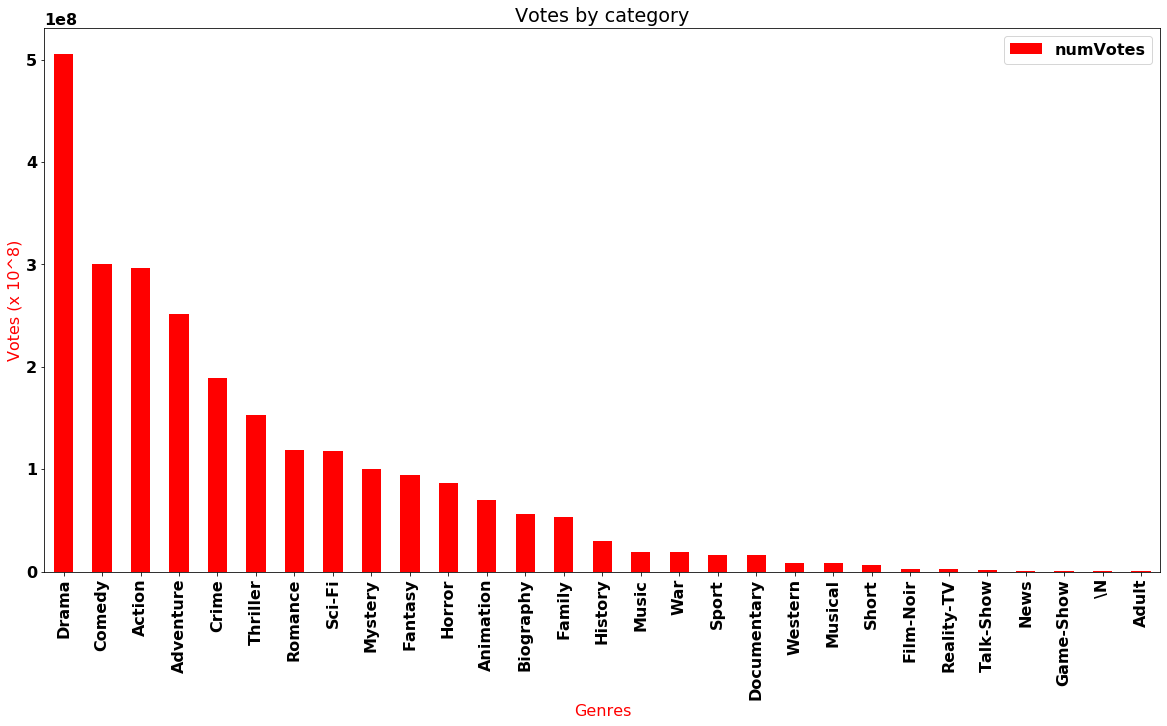

In [18]:


pl=df1.plot(kind='bar',figsize=(20,10),title='Votes by category',color='r')
pl.set_xlabel('Genres', color='r')
pl.set_ylabel('Votes (x 10^8)' ,  color='r')

plt.show()

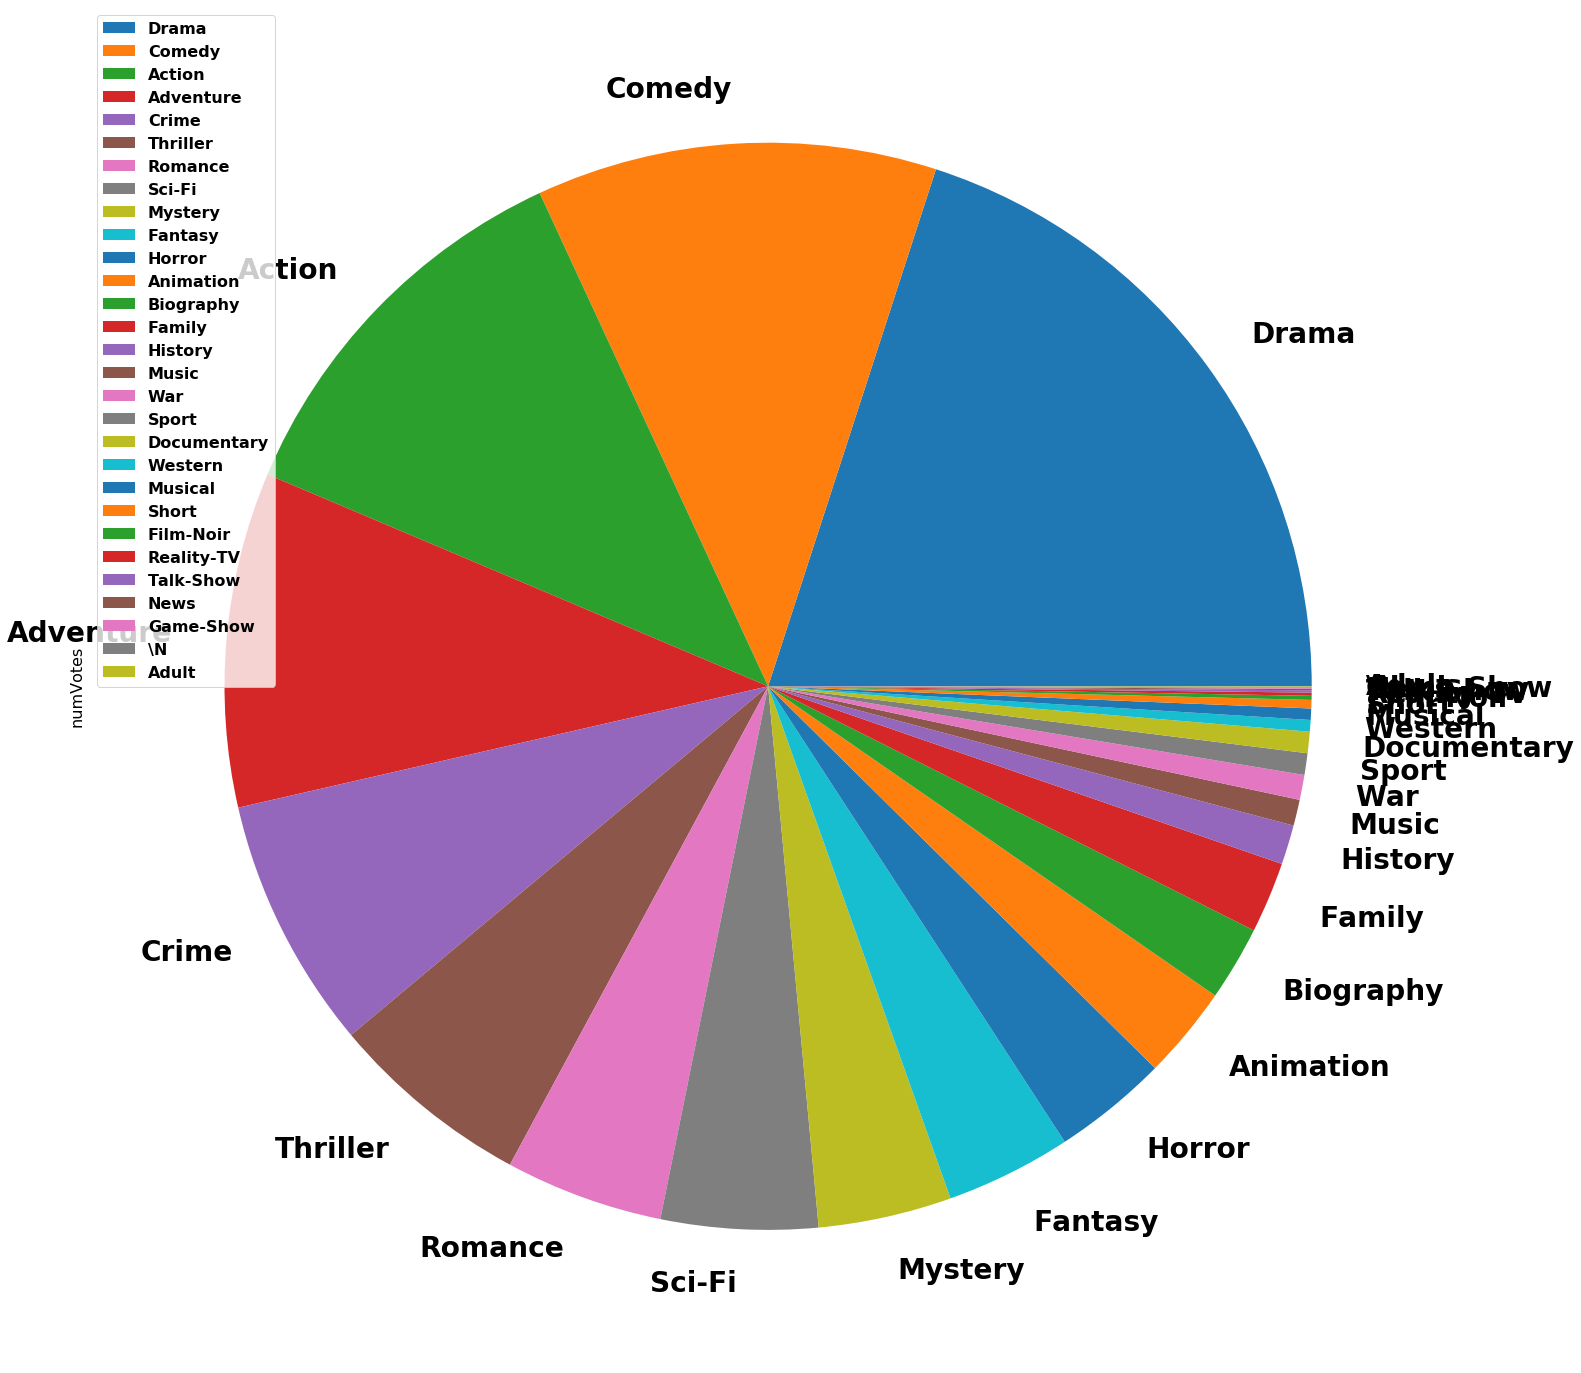

In [19]:
plot = df1.plot.pie(y='numVotes', figsize=(25, 25),fontsize=28)

In [ ]:
title_ratings_mean=title_ratings.mean()
title_ratings_mean

In [8]:
df_actor=title_ratings.drop('numVotes',axis=1)

In [42]:
title_basics[['endYear'==1932]]

ValueError: Item wrong length 1 instead of 6724400.

In [115]:
df_end=title_basics[['tconst','endYear']].groupby(by='endYear').count()
df_end.columns=['counts']
df_end=df_end.drop(['\\N'])
df_end_sorted=df_end.sort_values(by='counts',ascending=False)
df_end_sorted

,counts
endYear,
2017,4298
2018,3751
2016,3274
2019,3147
2015,2607
...,...
1924,1
1944,1
1937,1


Text(0, 0.5, 'No. of TV shows ended')

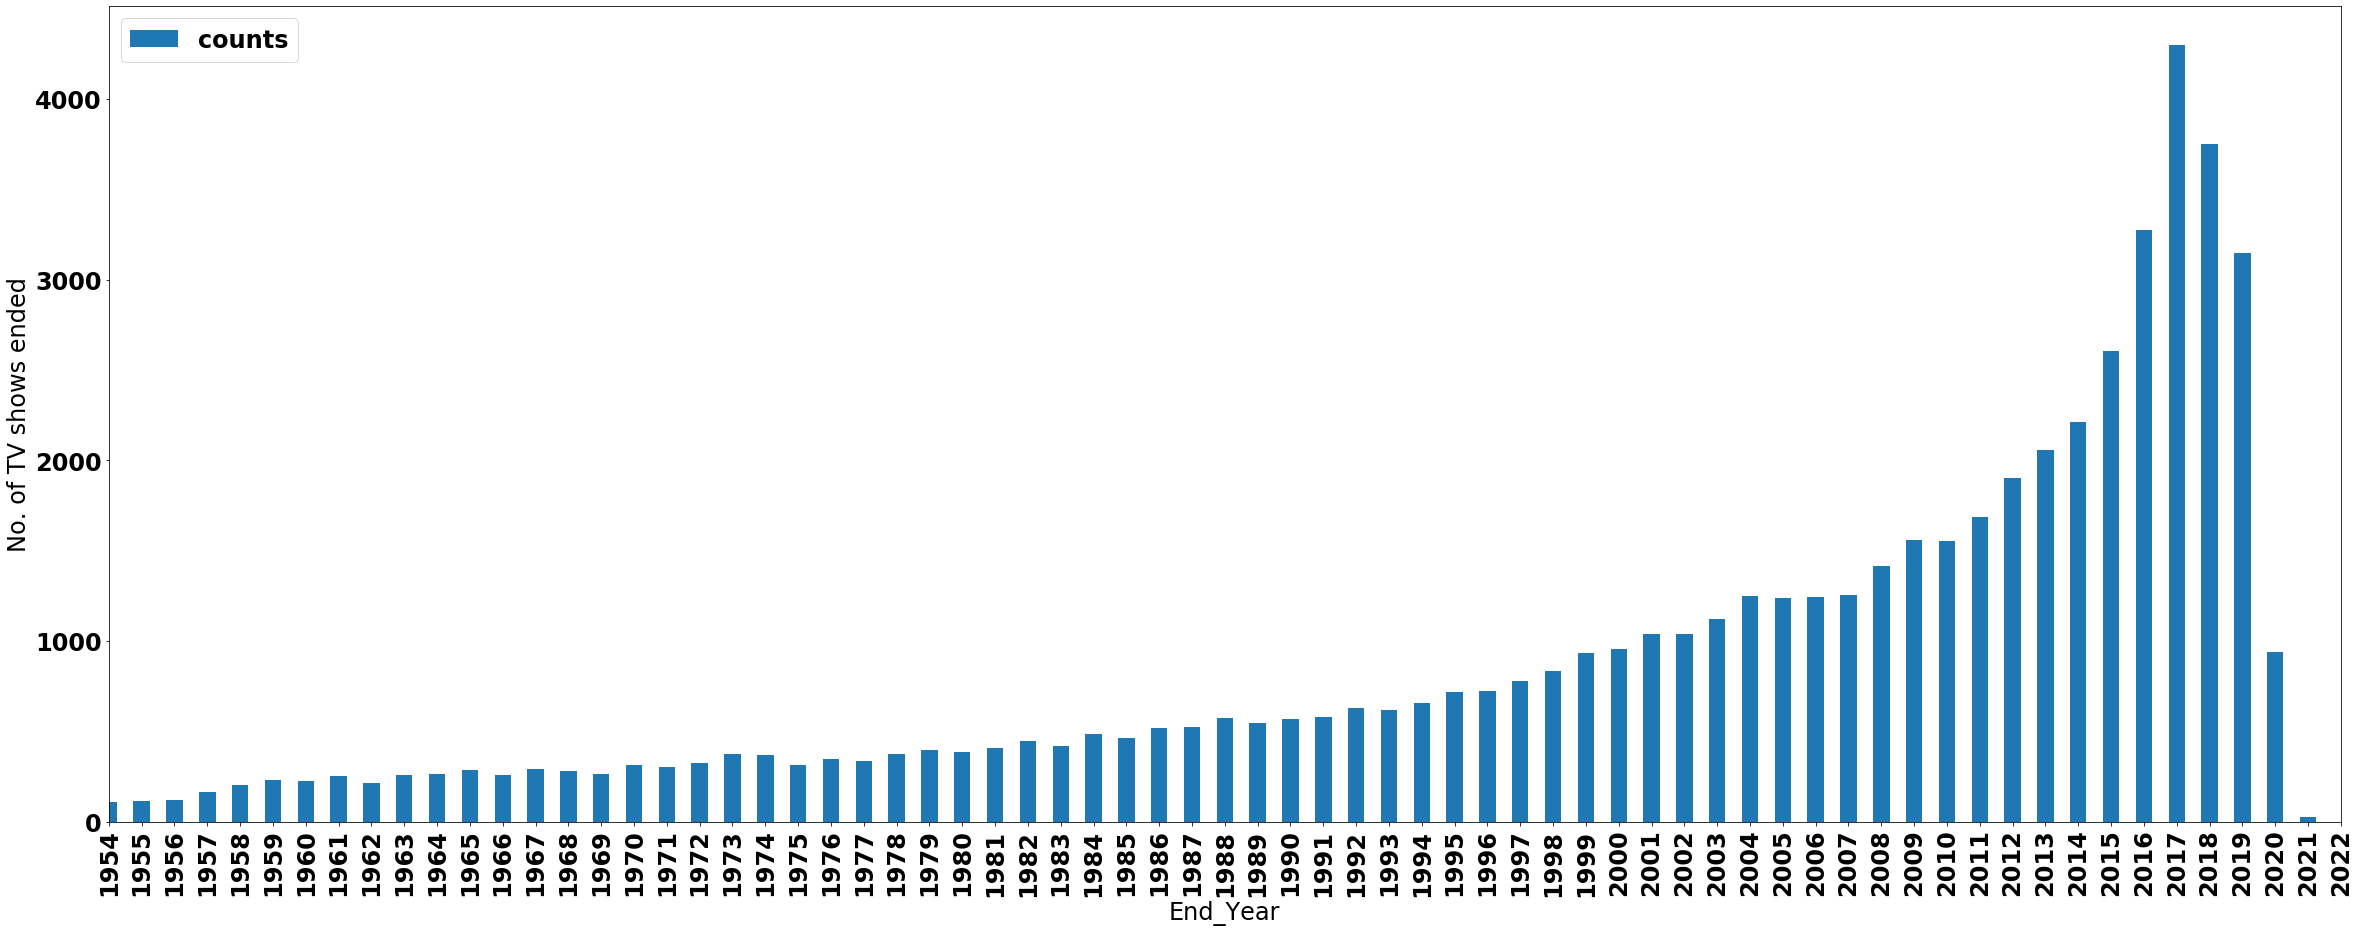

In [143]:
plt.rcParams.update({'font.size': 24,
                     'font.weight':'bold',
                    })
plot1=df_end.plot(kind='bar',figsize=(40,15))
plt.xlim(20,88)
plt.xlabel('End_Year')
plt.ylabel('No. of TV shows ended')

In [78]:
tv_titles=title_basics.titleType.unique()[3:8]

In [79]:
title_basics_tv=title_basics[title_basics.titleType.isin(tv_titles)]

In [80]:
df_runtime=title_basics_tv[['tconst','runtimeMinutes']]

In [29]:
df1=title_ratings.drop('numVotes',axis=1) 

In [82]:
df_runtime=df_runtime.merge(df1,on='tconst')

In [83]:
df_runtime

,tconst,runtimeMinutes,averageRating
0,tt0035803,12,7.8
1,tt0039120,30,3.0
2,tt0039123,60,8.5
3,tt0039125,20,5.9
4,tt0040021,30,7.2
...,...,...,...
550281,tt9916420,\N,7.1
550282,tt9916576,85,6.0
550283,tt9916578,\N,8.4
550284,tt9916766,43,6.8


In [84]:
(df_runtime['averageRating']>(df_runtime['averageRating']).mean())

0          True
1         False
2          True
3         False
4         False
          ...  
550281    False
550282    False
550283     True
550284    False
550285    False
Name: averageRating, Length: 550286, dtype: bool

In [88]:
df_runtime.replace(to_replace='\\N',value=0,inplace=True)

In [91]:
df_runtime.runtimeMinutes[396356]=0
df_runtime.runtimeMinutes[214772]=0



C:\Users\ganes\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ganes\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [92]:
pd.to_numeric(df_runtime.runtimeMinutes)

0         12
1         30
2         60
3         20
4         30
          ..
550281     0
550282    85
550283     0
550284    43
550285     0
Name: runtimeMinutes, Length: 550286, dtype: int64

In [94]:
df_runtime.runtimeMinutes=df_runtime.runtimeMinutes.astype('int32')

In [95]:
df_runtime.dtypes

tconst             object
runtimeMinutes      int32
averageRating     float64
dtype: object

In [96]:
df_runtime.replace(to_replace=0,value=np.nan,inplace=True)

In [100]:
df_runtime.runtimeMinutes.median()

39.0

In [103]:
df_runtime.runtimeMinutes=df_runtime.runtimeMinutes.fillna(value=df_runtime.runtimeMinutes.median())

In [104]:
df_runtime

,tconst,runtimeMinutes,averageRating
0,tt0035803,12.0,7.8
1,tt0039120,30.0,3.0
2,tt0039123,60.0,8.5
3,tt0039125,20.0,5.9
4,tt0040021,30.0,7.2
...,...,...,...
550281,tt9916420,39.0,7.1
550282,tt9916576,85.0,6.0
550283,tt9916578,39.0,8.4
550284,tt9916766,43.0,6.8


In [109]:
#Assuming TVShows having rating greater than mean ratngs are good tv shows.
(df_runtime.averageRating>=df_runtime.averageRating.mean()).sum()
#total 320921 shows considered out of 550286

320921

In [111]:
df_runtime_top=df_runtime[df_runtime.averageRating>=df_runtime.averageRating.mean()]

In [112]:
df_runtime_top

,tconst,runtimeMinutes,averageRating
0,tt0035803,12.0,7.8
2,tt0039123,60.0,8.5
9,tt0040036,30.0,8.4
10,tt0040041,60.0,7.7
11,tt0040042,30.0,7.8
...,...,...,...
550276,tt9916200,43.0,8.4
550277,tt9916204,42.0,8.2
550279,tt9916316,39.0,8.4
550280,tt9916380,43.0,9.2


In [113]:
df_runtime_top.runtimeMinutes.mean()

40.563852162993385

In [116]:
title_principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


## Actor-Director pair

In [5]:
title_principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


In [6]:
actor=title_principals[title_principals.category=='actor']
actor=actor[['tconst','nconst']]
actor.reset_index(inplace=True)
actor=actor.drop('index',axis=1)
actor.columns=['tconst','actor']

In [7]:
actor

,tconst,actor
0,tt0000005,nm0443482
1,tt0000005,nm0653042
2,tt0000007,nm0179163
3,tt0000007,nm0183947
4,tt0000008,nm0653028
...,...,...
9017840,tt9916852,nm5519557
9017841,tt9916852,nm8825009
9017842,tt9916856,nm10538646
9017843,tt9916880,nm1483166


In [8]:
director=title_crew.drop('writers',axis=1)
director

,tconst,directors
0,tt0000001,nm0005690
1,tt0000002,nm0721526
2,tt0000003,nm0721526
3,tt0000004,nm0721526
4,tt0000005,nm0005690
...,...,...
6721147,tt9916848,"nm5519454,nm5519375"
6721148,tt9916850,"nm5519375,nm5519454"
6721149,tt9916852,"nm5519454,nm5519375"
6721150,tt9916856,nm10538645


In [9]:
director=director.loc[director['directors']!='\\N']
director

,tconst,directors
0,tt0000001,nm0005690
1,tt0000002,nm0721526
2,tt0000003,nm0721526
3,tt0000004,nm0721526
4,tt0000005,nm0005690
...,...,...
6721147,tt9916848,"nm5519454,nm5519375"
6721148,tt9916850,"nm5519375,nm5519454"
6721149,tt9916852,"nm5519454,nm5519375"
6721150,tt9916856,nm10538645


In [10]:
ac_direc=actor.merge(director,how='inner',left_on='tconst',right_on='tconst')
ac_direc

,tconst,actor,directors
0,tt0000005,nm0443482,nm0005690
1,tt0000005,nm0653042,nm0005690
2,tt0000007,nm0179163,"nm0374658,nm0005690"
3,tt0000007,nm0183947,"nm0374658,nm0005690"
4,tt0000008,nm0653028,nm0005690
...,...,...,...
7056248,tt9916852,nm5519557,"nm5519454,nm5519375"
7056249,tt9916852,nm8825009,"nm5519454,nm5519375"
7056250,tt9916856,nm10538646,nm10538645
7056251,tt9916880,nm1483166,nm0996406


In [30]:
df1

,tconst,averageRating
0,tt0000001,5.6
1,tt0000002,6.0
2,tt0000003,6.5
3,tt0000004,6.1
4,tt0000005,6.1
...,...,...
1026234,tt9916576,6.0
1026235,tt9916578,8.4
1026236,tt9916720,5.6
1026237,tt9916766,6.8


In [31]:
ac_direc=ac_direc.merge(df1,how="inner",left_on='tconst',right_on='tconst')
ac_direc

,tconst,actor,directors,averageRating
0,tt0000005,nm0443482,nm0005690,6.1
1,tt0000005,nm0653042,nm0005690,6.1
2,tt0000007,nm0179163,"nm0374658,nm0005690",5.4
3,tt0000007,nm0183947,"nm0374658,nm0005690",5.4
4,tt0000008,nm0653028,nm0005690,5.4
...,...,...,...,...
2019799,tt9916544,nm7395788,nm3219235,7.2
2019800,tt9916544,nm7571612,nm3219235,7.2
2019801,tt9916578,nm0104787,nm0373673,8.4
2019802,tt9916578,nm0372423,nm0373673,8.4


In [32]:
ac_direc.describe()

,averageRating
count,2.019804e+06
mean,6.853707e+00
std,1.382208e+00
min,1.000000e+00
25%,6.100000e+00
50%,7.000000e+00
75%,7.800000e+00
max,1.000000e+01


In [33]:
#Keeping actor-director pair only for ratings equal to 10 to make visualization better.
ac_direc=ac_direc[ac_direc.averageRating==10]
ac_direc

,tconst,actor,directors,averageRating
78299,tt0050536,nm0297293,nm0928929,10.0
78300,tt0050536,nm0917076,nm0928929,10.0
78301,tt0050536,nm2080718,nm0928929,10.0
78302,tt0050536,nm6948643,nm0928929,10.0
104157,tt0061857,nm0182015,nm0351746,10.0
...,...,...,...,...
2010312,tt9622476,nm10409949,nm6634664,10.0
2010313,tt9622476,nm10409948,nm6634664,10.0
2014681,tt9759922,nm4786875,nm6561337,10.0
2014682,tt9759922,nm2932167,nm6561337,10.0


In [34]:
direc = pd.DataFrame(ac_direc.directors.str.split(',').tolist(), index=ac_direc.tconst).stack()
direc = direc.reset_index()[['tconst',0]] # var1 variable is currently labeled 0
direc.columns = [ 'tconst', 'directors'] # renaming var1
direc

,tconst,directors
0,tt0050536,nm0928929
1,tt0050536,nm0928929
2,tt0050536,nm0928929
3,tt0050536,nm0928929
4,tt0061857,nm0351746
...,...,...
3452,tt9622476,nm6634664
3453,tt9622476,nm6634664
3454,tt9759922,nm6561337
3455,tt9759922,nm6561337


In [35]:
direc=direc.drop_duplicates(ignore_index=True)

In [36]:
ac_direct=ac_direc.drop('directors',axis=1)

In [37]:
ac_direc=ac_direct.merge(direc,how='inner',left_on='tconst',right_on='tconst')
ac_direc=ac_direc[ac_direc.averageRating==10]
ac_direc

,tconst,actor,averageRating,directors
0,tt0050536,nm0297293,10.0,nm0928929
1,tt0050536,nm0917076,10.0,nm0928929
2,tt0050536,nm2080718,10.0,nm0928929
3,tt0050536,nm6948643,10.0,nm0928929
4,tt0061857,nm0182015,10.0,nm0351746
...,...,...,...,...
3452,tt9622476,nm10409949,10.0,nm6634664
3453,tt9622476,nm10409948,10.0,nm6634664
3454,tt9759922,nm4786875,10.0,nm6561337
3455,tt9759922,nm2932167,10.0,nm6561337


In [38]:
new=((ac_direc.drop('tconst',axis=1)).groupby(by=['actor','directors'],as_index=False).count())

In [39]:

new.rename(columns={"averageRating":"Count_10"},inplace=True)
new=new.sort_values(by='Count_10',ascending=False,ignore_index=True)
new

,actor,directors,Count_10
0,nm10640878,nm10640878,96
1,nm10297145,nm10640878,94
2,nm10297145,nm10297145,81
3,nm10640878,nm10297145,76
4,nm7603068,nm7870411,53
...,...,...,...
2385,nm1822600,nm2029597,1
2386,nm1814267,nm1814267,1
2387,nm1813595,nm2233387,1
2388,nm1813595,nm1813595,1


In [40]:
z=range(100)
new_pair=new[new['Count_10']>5]
new_pair

,actor,directors,Count_10
0,nm10640878,nm10640878,96
1,nm10297145,nm10640878,94
2,nm10297145,nm10297145,81
3,nm10640878,nm10297145,76
4,nm7603068,nm7870411,53
5,nm7603068,nm7477059,53
6,nm5092260,nm7477059,50
7,nm5092260,nm7870411,50
8,nm4530933,nm1341249,18
9,nm1162129,nm1341249,16


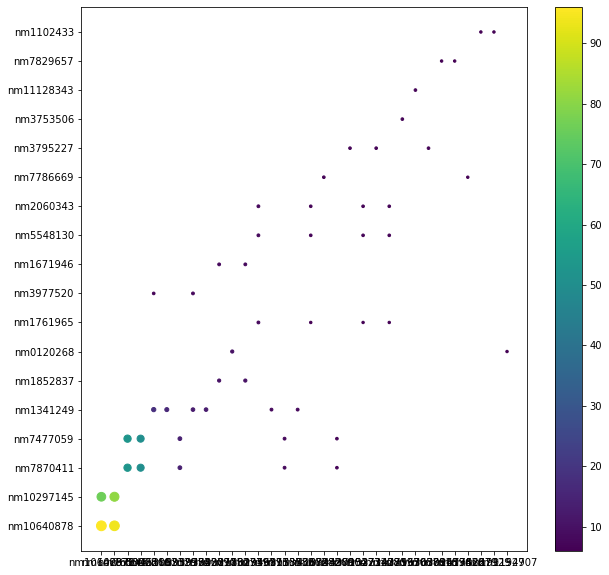

In [66]:
plt.figure(figsize=(10,10))
sc=plt.scatter(new_pair.actor,new_pair.directors,s=new_pair.Count_10,c=new_pair.Count_10)
plt.colorbar(sc)
plt.show()

In [59]:
print(name.loc[name['nconst']==new_pair.actor[0]].primaryName)

KeyError: 0

In [364]:
name['nconst']=name['nconst'].astype(str)

In [43]:
new_pair['name_actor']=name

ValueError: Wrong number of items passed 2, placement implies 1

In [41]:
name

NameError: name 'name' is not defined

In [371]:
#i=new_pair.actor[0].()
#[name.loc[name['nconst']==i].primaryName[0]]

In [114]:
name_basics

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0043044,tt0050419,tt0053137,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0038355,tt0117057,tt0071877"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,producer","tt0054452,tt0059956,tt0057345,tt0049189"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0080455,tt0077975,tt0072562"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0083922,tt0060827,tt0050986"
...,...,...,...,...,...,...
10022855,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department",tt2455546
10022856,nm9993716,Essias Loberg,\N,\N,NaN,\N
10022857,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744
10022858,nm9993718,Aayush Nair,\N,\N,cinematographer,\N


In [42]:
name=name_basics[['nconst','primaryName']]
name

,nconst,primaryName
0,nm0000001,Fred Astaire
1,nm0000002,Lauren Bacall
2,nm0000003,Brigitte Bardot
3,nm0000004,John Belushi
4,nm0000005,Ingmar Bergman
...,...,...
10022855,nm9993714,Romeo del Rosario
10022856,nm9993716,Essias Loberg
10022857,nm9993717,Harikrishnan Rajan
10022858,nm9993718,Aayush Nair


In [92]:
new_pair2=new_pair

In [93]:
new_pair2=new_pair2.merge(name,left_on='actor',right_on='nconst',)
new_pair2=new_pair2.drop('actor',axis=1)
new_pair2=new_pair2.drop('nconst',axis=1)
new_pair2.rename({'primaryName':'actor'},inplace=True)
new_pair2

,directors,Count_10,primaryName
0,nm10640878,96,Thanasis Tachtsidis
1,nm10297145,76,Thanasis Tachtsidis
2,nm10640878,94,Nikos Tsoup
3,nm10297145,81,Nikos Tsoup
4,nm7870411,53,Alpesh Dhakan
5,nm7477059,53,Alpesh Dhakan
6,nm7477059,50,Vishesh Bansal
7,nm7870411,50,Vishesh Bansal
8,nm1341249,18,Tom Gregory
9,nm3977520,7,Tom Gregory


In [94]:
new_pair2.rename(columns={'primaryName':'actor'},inplace=True)
new_pair2

,directors,Count_10,actor
0,nm10640878,96,Thanasis Tachtsidis
1,nm10297145,76,Thanasis Tachtsidis
2,nm10640878,94,Nikos Tsoup
3,nm10297145,81,Nikos Tsoup
4,nm7870411,53,Alpesh Dhakan
5,nm7477059,53,Alpesh Dhakan
6,nm7477059,50,Vishesh Bansal
7,nm7870411,50,Vishesh Bansal
8,nm1341249,18,Tom Gregory
9,nm3977520,7,Tom Gregory


In [95]:
new_pair2=new_pair2.merge(name,left_on='directors',right_on='nconst',)
new_pair2=new_pair2.drop('directors',axis=1)
new_pair2=new_pair2.drop('nconst',axis=1)
new_pair2.rename(columns={'primaryName':'directors'},inplace=True)
new_pair2

,Count_10,actor,directors
0,96,Thanasis Tachtsidis,Thanasis Tachtsidis
1,94,Nikos Tsoup,Thanasis Tachtsidis
2,76,Thanasis Tachtsidis,Nikos Tsoup
3,81,Nikos Tsoup,Nikos Tsoup
4,53,Alpesh Dhakan,Prateek Shah
5,50,Vishesh Bansal,Prateek Shah
6,14,Pragyaj Jain,Prateek Shah
7,8,Arjun Aneja,Prateek Shah
8,7,Shaheer Sheikh,Prateek Shah
9,53,Alpesh Dhakan,Noel Smith


In [98]:
new_pair2=new_pair2.sort_values(by='Count_10',ignore_index=True,ascending=False)
new_pair2

,Count_10,actor,directors
0,96,Thanasis Tachtsidis,Thanasis Tachtsidis
1,94,Nikos Tsoup,Thanasis Tachtsidis
2,81,Nikos Tsoup,Nikos Tsoup
3,76,Thanasis Tachtsidis,Nikos Tsoup
4,53,Alpesh Dhakan,Prateek Shah
5,53,Alpesh Dhakan,Noel Smith
6,50,Vishesh Bansal,Noel Smith
7,50,Vishesh Bansal,Prateek Shah
8,18,Tom Gregory,Brendon deVore
9,16,John Chaney,Brendon deVore


In [101]:
new_pair2=new_pair2.sample(frac=1).reset_index(drop=True)

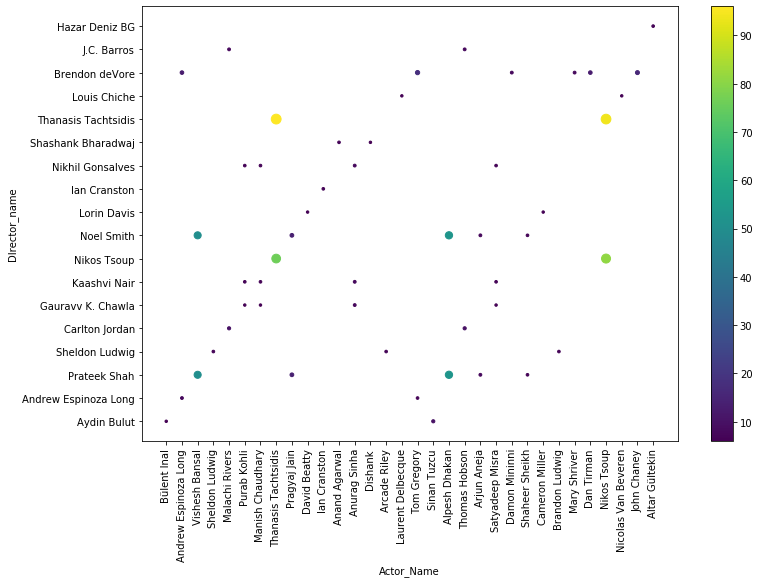

In [106]:
plt.figure(figsize=(12,8))
sc=plt.scatter(new_pair2.actor,new_pair2.directors,s=new_pair2.Count_10,c=new_pair2.Count_10)
plt.colorbar(sc)
plt.xticks(rotation=90)
plt.xlabel("Actor_Name")
plt.ylabel("DIrector_name")
#plt.annotate(xy=(new_pair2.index,new_pair2.index),new_pair2.Count_10)
plt.show()

In [161]:
np.asarray(name.nconst)

array(['nm0000001', 'nm0000002', 'nm0000003', ..., 'nm9993717',
       'nm9993718', 'nm9993719'], dtype=object)

In [182]:
new_pair.actor[0]

'nm10640878'

In [346]:
name

,nconst,primaryName
0,nm0000001,Fred Astaire
1,nm0000002,Lauren Bacall
2,nm0000003,Brigitte Bardot
3,nm0000004,John Belushi
4,nm0000005,Ingmar Bergman
...,...,...
10022855,nm9993714,Romeo del Rosario
10022856,nm9993716,Essias Loberg
10022857,nm9993717,Harikrishnan Rajan
10022858,nm9993718,Aayush Nair


##  Age bRacket

In [249]:
title_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [250]:
title_principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


In [272]:
name_basics.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0043044,tt0050419,tt0053137,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0038355,tt0117057,tt0071877"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,producer","tt0054452,tt0059956,tt0057345,tt0049189"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0080455,tt0077975,tt0072562"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0083922,tt0060827,tt0050986"


In [273]:
title_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.6,1605
1,tt0000002,6.0,197
2,tt0000003,6.5,1278
3,tt0000004,6.1,121
4,tt0000005,6.1,2042


In [274]:
df=title_basics[['tconst','startYear']]

In [275]:
actor

,tconst,actor
0,tt0000005,nm0443482
1,tt0000005,nm0653042
2,tt0000007,nm0179163
3,tt0000007,nm0183947
4,tt0000008,nm0653028
...,...,...
9017840,tt9916852,nm5519557
9017841,tt9916852,nm8825009
9017842,tt9916856,nm10538646
9017843,tt9916880,nm1483166


In [276]:
df=df.merge(actor)

In [277]:
df

,tconst,startYear,actor
0,tt0000005,1893,nm0443482
1,tt0000005,1893,nm0653042
2,tt0000007,1894,nm0179163
3,tt0000007,1894,nm0183947
4,tt0000008,1894,nm0653028
...,...,...,...
8998526,tt9916852,2010,nm5519557
8998527,tt9916852,2010,nm8825009
8998528,tt9916856,2015,nm10538646
8998529,tt9916880,2014,nm1483166


In [278]:
birth=name_basics[['nconst','birthYear']]
birth

,nconst,birthYear
0,nm0000001,1899
1,nm0000002,1924
2,nm0000003,1934
3,nm0000004,1949
4,nm0000005,1918
...,...,...
10022855,nm9993714,\N
10022856,nm9993716,\N
10022857,nm9993717,\N
10022858,nm9993718,\N


In [279]:
df=df.merge(birth,left_on='actor',right_on='nconst')
df

,tconst,startYear,actor,nconst,birthYear
0,tt0000005,1893,nm0443482,nm0443482,1878
1,tt0000005,1893,nm0653042,nm0653042,1850
2,tt0000007,1894,nm0179163,nm0179163,1866
3,tt0003116,1913,nm0179163,nm0179163,1866
4,tt0003730,1914,nm0179163,nm0179163,1866
...,...,...,...,...,...
8987195,tt9916746,2012,nm10538628,nm10538628,\N
8987196,tt9916746,2012,nm10538627,nm10538627,\N
8987197,tt9916746,2012,nm10538629,nm10538629,\N
8987198,tt9916764,2018,nm10538641,nm10538641,\N


In [280]:
df=df.drop('nconst',axis=1)

In [281]:
df=df.loc[df.startYear!='\\N']
df=df.loc[df.birthYear!='\\N']
df

,tconst,startYear,actor,birthYear
0,tt0000005,1893,nm0443482,1878
1,tt0000005,1893,nm0653042,1850
2,tt0000007,1894,nm0179163,1866
3,tt0003116,1913,nm0179163,1866
4,tt0003730,1914,nm0179163,1866
...,...,...,...,...
8987017,tt9910502,2019,nm1579619,1976
8987082,tt9913502,2018,nm9869665,1990
8987089,tt9913574,2014,nm1320801,1976
8987128,tt9914754,2017,nm1400050,1969


In [282]:
df=df.astype({'startYear' : 'int32', 'birthYear' : 'int32'})

In [283]:
df['age']=df['startYear']-df['birthYear']
df

,tconst,startYear,actor,birthYear,age
0,tt0000005,1893,nm0443482,1878,15
1,tt0000005,1893,nm0653042,1850,43
2,tt0000007,1894,nm0179163,1866,28
3,tt0003116,1913,nm0179163,1866,47
4,tt0003730,1914,nm0179163,1866,48
...,...,...,...,...,...
8987017,tt9910502,2019,nm1579619,1976,43
8987082,tt9913502,2018,nm9869665,1990,28
8987089,tt9913574,2014,nm1320801,1976,38
8987128,tt9914754,2017,nm1400050,1969,48


In [284]:
df=df[['tconst','age']]
df

,tconst,age
0,tt0000005,15
1,tt0000005,43
2,tt0000007,28
3,tt0003116,47
4,tt0003730,48
...,...,...
8987017,tt9910502,43
8987082,tt9913502,28
8987089,tt9913574,38
8987128,tt9914754,48


In [285]:
df1

,tconst,averageRating
0,tt0000001,5.6
1,tt0000002,6.0
2,tt0000003,6.5
3,tt0000004,6.1
4,tt0000005,6.1
...,...,...
1026234,tt9916576,6.0
1026235,tt9916578,8.4
1026236,tt9916720,5.6
1026237,tt9916766,6.8


In [286]:
df=df.merge(df1,left_on='tconst',right_on='tconst')

In [327]:
df=df.drop('tconst',axis=1)

KeyError: "['tconst'] not found in axis"

In [328]:
df2=df.groupby(by='age',as_index=False).mean()

In [330]:
df2=df2.loc[df2.age >= 10]
df2=df2.loc[df2.age <= 81]
#df2=df2.sort_values(by='averageRating',ascending=False)

In [331]:
df2.head(10)

,age,averageRating
38,10,6.976879
39,11,6.877750
40,12,6.949685
41,13,6.947281
42,14,7.034731
43,15,7.045076
44,16,7.070021
45,17,7.087543
46,18,7.031441
47,19,7.042567


(array([7.99842367, 6.94491593, 6.86631415, 6.93252517, 6.93606872,
        6.91181822, 6.91102088, 6.86352695, 6.88000321, 7.8029191 ]),
 array([10. , 17.1, 24.2, 31.3, 38.4, 45.5, 52.6, 59.7, 66.8, 73.9, 81. ]),
 <a list of 10 Patch objects>)

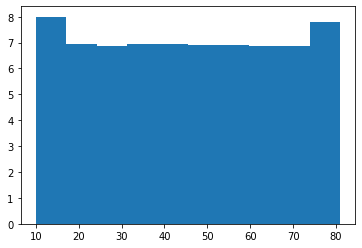

In [332]:
plt.hist(df2.age,bins=10,weights=(df2.averageRating)/7)